In [2]:
import pandas as pd
import os

In [3]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    data = pd.concat([data, df])

data.to_csv("alldata.csv",index=False)


In [4]:
alldata = pd.read_csv("alldata.csv")
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# clean up the data and show nan's

In [6]:
nandata = alldata[alldata.isna().any(axis=1)]
display(nandata.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
alldata = alldata.dropna(how='all')
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# add month column

In [9]:
alldata = alldata[alldata["Order Date"].str[0:2] != 'Or']

alldata["month"] = alldata["Order Date"].str[0:2]
alldata["month"] = alldata["month"].astype("int32")
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# here find in order date some Or's

In [13]:
alldata['Month 2'] = pd.to_datetime(alldata['Order Date']).dt.month
display(alldata.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Month 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


# sales month = quantity multiple by price each

#### convert column to the correct type

In [68]:
alldata["Quantity Ordered"] = pd.to_numeric(alldata["Quantity Ordered"])
alldata["Price Each"] = pd.to_numeric(alldata["Price Each"])

In [16]:
alldata["sales"] = alldata["Quantity Ordered"].astype('int') * alldata["Price Each"].astype('float')

alldata.groupby(['month']).sum()

alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Month 2,city,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA),99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99


## just show sales from alldata

In [15]:
results = alldata.groupby("month").sum()
results.head()

,Month 2
month,
1,9709
2,23950
3,45459
4,73116
5,82830


## add city column

In [14]:
def getcity(address):
    return address.split(",")[1]

def getstate(address):
    return address.split(",")[2].split(" ")[1]

alldata["city"] = alldata["Purchase Address"].apply(lambda x: f"{getcity(x)} ({getstate(x)})")

alldata.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Month 2,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA)


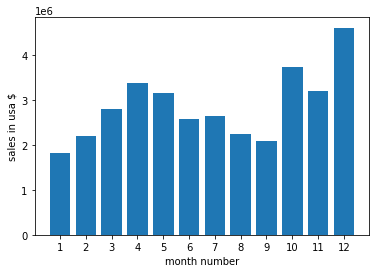

In [83]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results["sales"])
plt.xticks(months)
plt.ylabel("sales in usa $")
plt.xlabel("month number")
plt.show()


In [124]:
results = alldata.groupby("city").sum()
results

,Quantity Ordered,Price Each,month,sales
city,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


#### what city had the highest number of sales

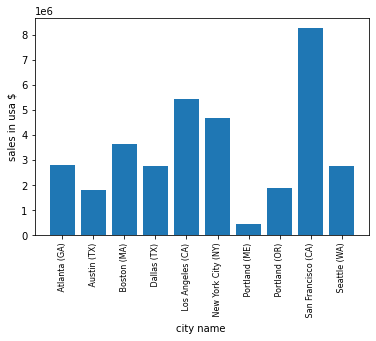

In [123]:
import matplotlib.pyplot as plt

cities = [city for city, df in alldata.groupby("city")]

plt.bar(cities, results["sales"])
plt.xticks(cities, rotation="vertical", size=8)
plt.ylabel("sales in usa $")
plt.xlabel("city name ")
plt.show()


In [ ]:
alldata["Order Data"] = pd.to_datetime(alldata['Order Date'])

### what time should we display advertisiments to maximize likelihood of costumer's buying product

In [ ]:
alldata.head["hour"] = alldata["Order Date"].dt.hour
alldata.head["minutes"] = alldata["Order Date"].dt.minute

alldata.head()

In [1]:
hours = [hour for hour, df in alldata.groupby("hour")]

plt.plot(hours, alldata.groupby(["hour"]).count())

#alldata.groupby(["hour"])

NameError: name 'alldata' is not defined